***Exploratory Data Analysis***

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\chelt'

In [3]:
%cd c:\\users\chelt\desktop\upwork\data science with python\task 4\

c:\users\chelt\desktop\upwork\data science with python\task 4


In [8]:
heart_df = pd.read_csv('heart.csv')

In [9]:
heart_df.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heart_df.columns

Index(['ID', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
ID          303 non-null int64
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [13]:
heart_df.groupby('sex')['sex'].count()

sex
0     96
1    207
Name: sex, dtype: int64

***1 = male, 0 = female***

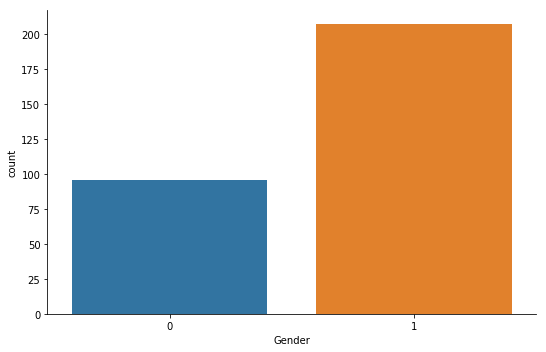

In [14]:
fg = sns.catplot('sex', data=heart_df, kind='count', aspect=1.5)
fg.set_xlabels('Gender')

***many more men in this dataset than women***

In [16]:
heart_df.groupby('age')['age'].count()

age
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64

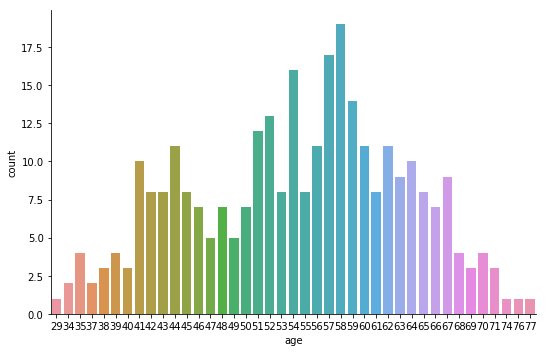

In [17]:
sns.catplot('age', data=heart_df, kind='count', aspect=1.5)

***most of the data is for individuals in their 50's***

Let's split them apart

In [19]:
heart_df.groupby(['sex', 'age'])['sex'].count()

sex  age
0    34     1
     35     1
     37     1
     39     2
     41     4
           ..
1    67     6
     68     3
     69     2
     70     4
     77     1
Name: sex, Length: 73, dtype: int64

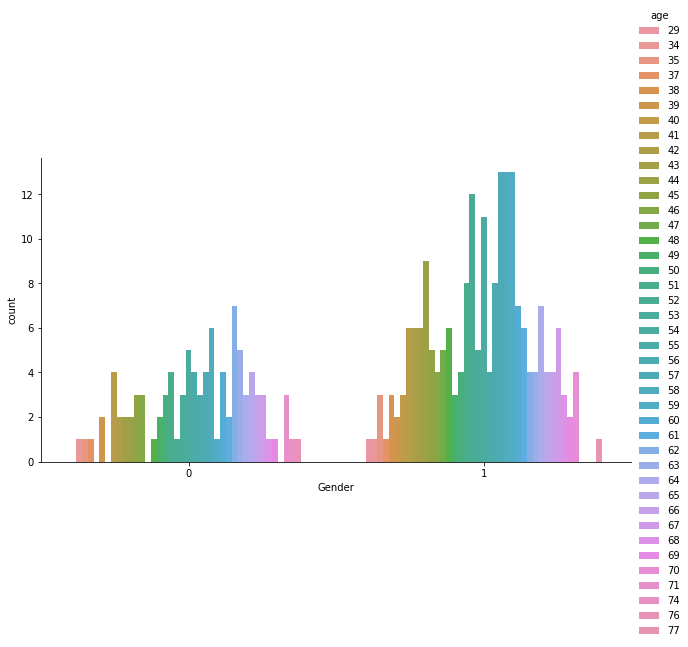

In [20]:
g = sns.catplot('sex', data=heart_df, hue='age', kind='count', aspect=1.75)
g.set_xlabels('Gender')

overwhelmingly men in their 50's

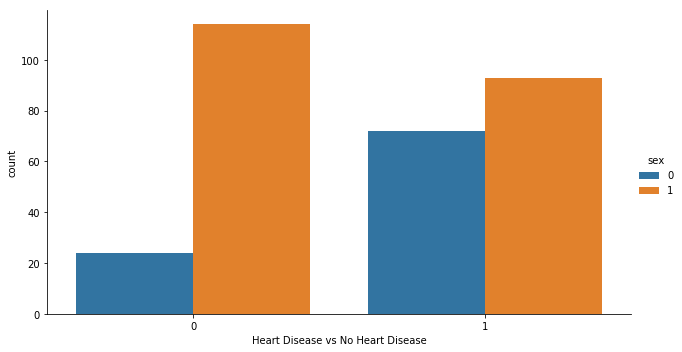

In [21]:
g = sns.catplot('target', data=heart_df, hue='sex', kind='count', aspect=1.75)
g.set_xlabels('Heart Disease vs No Heart Disease')

***When we subset the data to see those with heart disease, it's much more even,
although men are much more represented in this dataset***

investigating individuals with high blood sugar

In [24]:
heart_df.pivot_table('target', 'sex', 'fbs', aggfunc=np.sum, margins=True)

fbs,0,1,All
sex,,,
0,66,6,72
1,76,17,93
All,142,23,165


In [25]:
HeartDisease = heart_df[heart_df['target']==1]

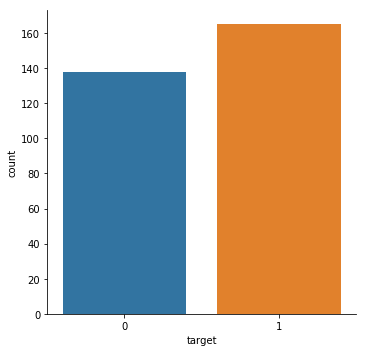

In [26]:
sns.catplot('target', data=heart_df, kind='count')

about 53% of the individuals in the data have heart disease present

In [27]:
len(HeartDisease)

165

In [28]:
HeartDisease.pivot_table('target', 'sex', 'fbs', aggfunc=len, margins=True)

fbs,0,1,All
sex,,,
0,66,6,72
1,76,17,93
All,142,23,165


***Most of the individuals with heart disease have lower than a 120 fasting blood glucose!!!***

In [29]:
HeartDisease.pivot_table('target', 'sex', 'restecg', aggfunc=len, margins=True)

restecg,0,1,2,All
sex,,,,
0,31.0,40.0,1.0,72
1,37.0,56.0,NaN,93
All,68.0,96.0,1.0,165


***Most of the individuals also had a regular ecg result***

In [31]:
print('Average and median age of patients are %0.f and %0.f years old, respectively'%(heart_df.age.mean(), 
                                                                                       heart_df.age.median()))

Average and median age of patients are 54 and 55 years old, respectively


In [32]:
heart_df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

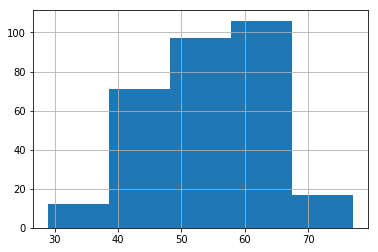

In [37]:
heart_df['age'].hist(bins=5)

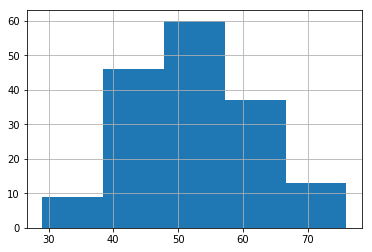

In [38]:
HeartDisease['age'].hist(bins=5)

***Interesting difference between the total age distribution of all patients and the distribution 
of those with heart disease.  This tells us heart disease is usually detected in the 40's and 50's***

kde plot, Distribution of Patient's ages

Grouped by gender

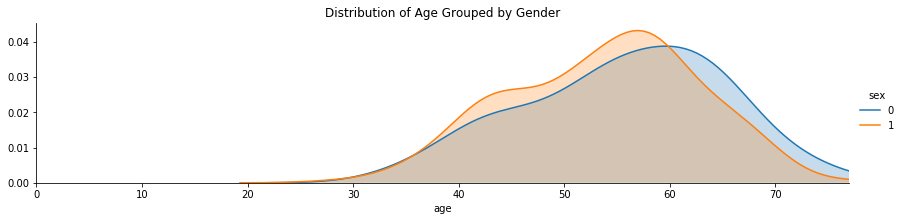

In [39]:
fig = sns.FacetGrid(heart_df, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = heart_df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

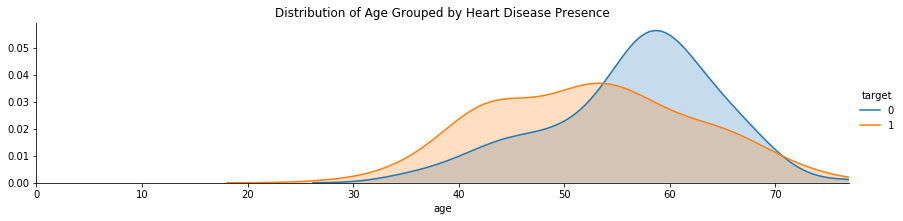

In [40]:
fig = sns.FacetGrid(heart_df, hue='target', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = heart_df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Heart Disease Presence')
fig.add_legend()

***It looks like if you make it to around ~55 years without heart disease, you are unlikely to develop it***

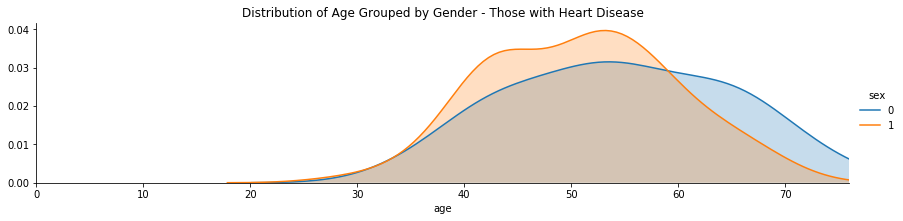

In [41]:
fig = sns.FacetGrid(HeartDisease, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = HeartDisease['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender - Those with Heart Disease')
fig.add_legend()

Males and females peak at around 55

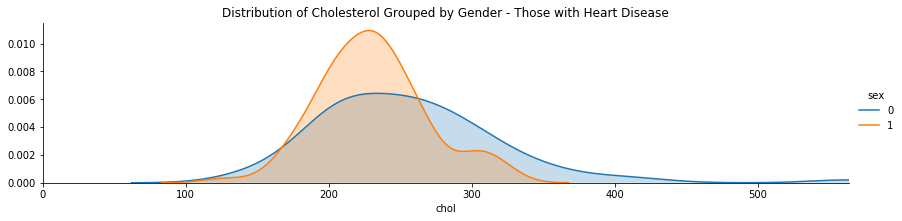

In [42]:
fig = sns.FacetGrid(HeartDisease, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'chol', shade=True)
oldest = HeartDisease['chol'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Cholesterol Grouped by Gender - Those with Heart Disease')
fig.add_legend()

We definitely see a normal distribution and a peak for cholesterol levels for those with heart disease.  
Looks like men have a much higher peak and would be easier to identify than women

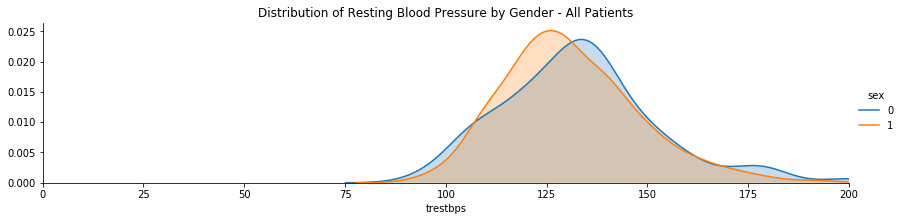

In [43]:
fig = sns.FacetGrid(heart_df, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'trestbps', shade=True)
oldest = heart_df['trestbps'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Resting Blood Pressure by Gender - All Patients')
fig.add_legend()

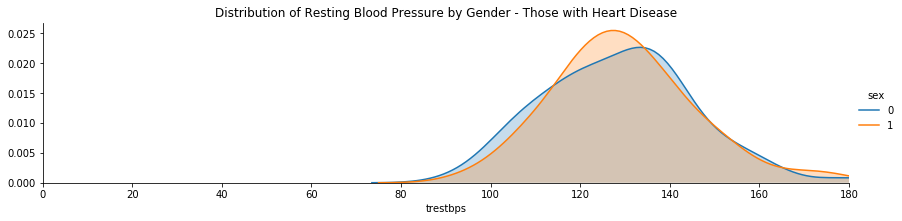

In [44]:
fig = sns.FacetGrid(HeartDisease, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'trestbps', shade=True)
oldest = HeartDisease['trestbps'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Resting Blood Pressure by Gender - Those with Heart Disease')
fig.add_legend()

***Those with heart disease have a higher resting blood pressure***

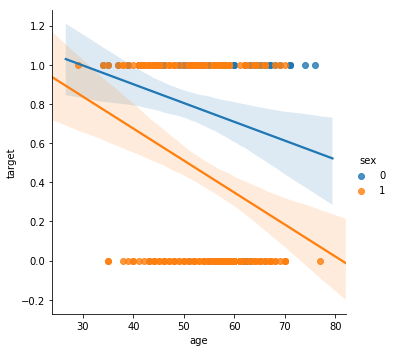

In [45]:
# Linear plot of age vs. heart disease grouped by sex
sns.lmplot('age', 'target', data=heart_df, hue='sex')

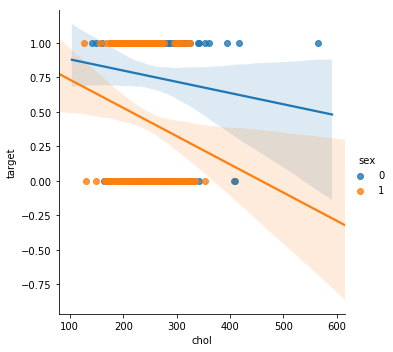

In [48]:
# Linear plot of cholesterol levels vs. heart disease grouped by sex
sns.lmplot('chol', 'target', data=heart_df, hue='sex')

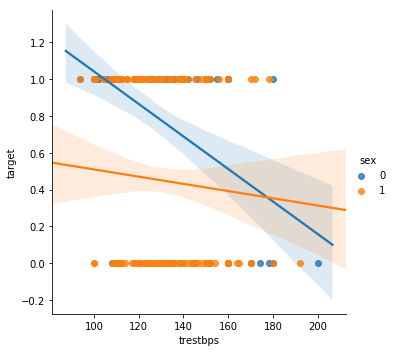

In [49]:
# Linear plot of resting blood pressure vs. heart disease grouped by sex
sns.lmplot('trestbps', 'target', data=heart_df, hue='sex')

***Time to build some classification models***

In [50]:
#Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [51]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [52]:
#cross validation
from sklearn.model_selection import train_test_split

In [53]:
#set the dependent variable
depVar = heart_df['target']

In [54]:
#features
features = heart_df.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
#Training Set (Feature Space: X Training)
X_train = (features)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#Dependent Variable Training Set (y Training)
y_train = depVar
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 303


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [57]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
203   68    1   2       180   274    1        0      150      1      1.6   
204   62    0   0       160   164    0        0      145      0      6.2   
205   52    1   0       128   255    0        1      161      1      0.0   
206   59    1   0       110   239    0        0      142      1      1.2   
207   60    0   0       150   258    0        0      157      0      2.6   

     slope  ca  thal  target  
203      1   0     3       0  
204      0   3     3       0  
205      2   1     3       0  
206      1   1     3       0  
207      1   2     3       0  


In [58]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


203    0
204    0
205    0
206    0
207    0
Name: target, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((227, 14), (76, 14))

In [60]:
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [62]:
 # Random Forest 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))
KappaRF = cohen_kappa_score(y_test, y_pred)
print(KappaRF)

Accuracy on Test Set for RandomForest = 1.00
Mean RandomForest CrossVal Accuracy on Train Set 1.00, with std=0.00
1.0


In [63]:
# kernel SVM 

from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf", gamma='scale')
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVM = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVM.mean(), scoresSVM.std() ))
KappaSVM = cohen_kappa_score(y_test, y_pred)
print(KappaSVM)

Accuracy on Test Set for kernel-SVM = 0.67
Mean kernel-SVM CrossVal Accuracy on Train Set 0.65, with std=0.06
0.2921013412816692


In [64]:
# Neural Nets

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
classifier2 = MLPClassifier(solver='lbfgs', random_state=1)
classifier2.fit( X_train, y_train )
y_pred = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for Neural Nets = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNN = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean Neural Nets CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNN.mean(), scoresNN.std() ))
KappaNN = cohen_kappa_score(y_test, y_pred)
print(KappaNN)

Accuracy on Test Set for Neural Nets = 0.42
Mean Neural Nets CrossVal Accuracy on Train Set 0.47, with std=0.02
0.0


***The RF model was able to predict with 100% accuracy and 100% agreement, this is very significant 
and could be very important***

In [66]:
print(scoresRF)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [67]:
print(scoresSVM)

[0.625      0.65217391 0.56521739 0.7826087  0.56521739 0.65217391
 0.72727273 0.63636364 0.63636364 0.68181818]


In [68]:
print(scoresNN)

[0.45833333 0.52173913 0.47826087 0.47826087 0.47826087 0.47826087
 0.45454545 0.45454545 0.45454545 0.45454545]


***Unfortunately our sample dataset is small, but with the random forest model performing that much better than 
the other two models, it's worth exploring much further with larger datasets***